Seaborn niedostępny, używam matplotlib
✓ Obraz wczytany pomyślnie z: 9.webp
Wymiary obrazu: (519, 800)
Zakres wartości: [0, 4095]
Liczba bitów: 12-bit (0-4095)

Zakres znormalizowany: [0.0000, 1.0000]

MACIERZ KORELACJI WIERSZY
Wymiary macierzy korelacji wierszy: (519, 519)
Średnia korelacja (bez diagonali): 0.5340
Min korelacja: 0.1191
Max korelacja: 1.0000

MACIERZ KORELACJI KOLUMN
Wymiary macierzy korelacji kolumn: (800, 800)
Średnia korelacja (bez diagonali): 0.4974
Min korelacja: -0.2194
Max korelacja: 1.0000

ROZKŁAD SVD (Singular Value Decomposition)
Wymiary U: (519, 519)
Wymiary S: (519,)
Wymiary V^T: (519, 800)

5 największych wartości osobliwych:
  σ_1 = 232.408630
  σ_2 = 61.020592
  σ_3 = 46.112953
  σ_4 = 29.443039
  σ_5 = 27.323881

Wariancja wyjaśniana przez pierwsze 5 komponent:
  σ_1: 81.71% (skumulowana: 81.71%)
  σ_2: 5.63% (skumulowana: 87.34%)
  σ_3: 3.22% (skumulowana: 90.56%)
  σ_4: 1.31% (skumulowana: 91.87%)
  σ_5: 1.13% (skumulowana: 93.00%)

Liczba komponent 

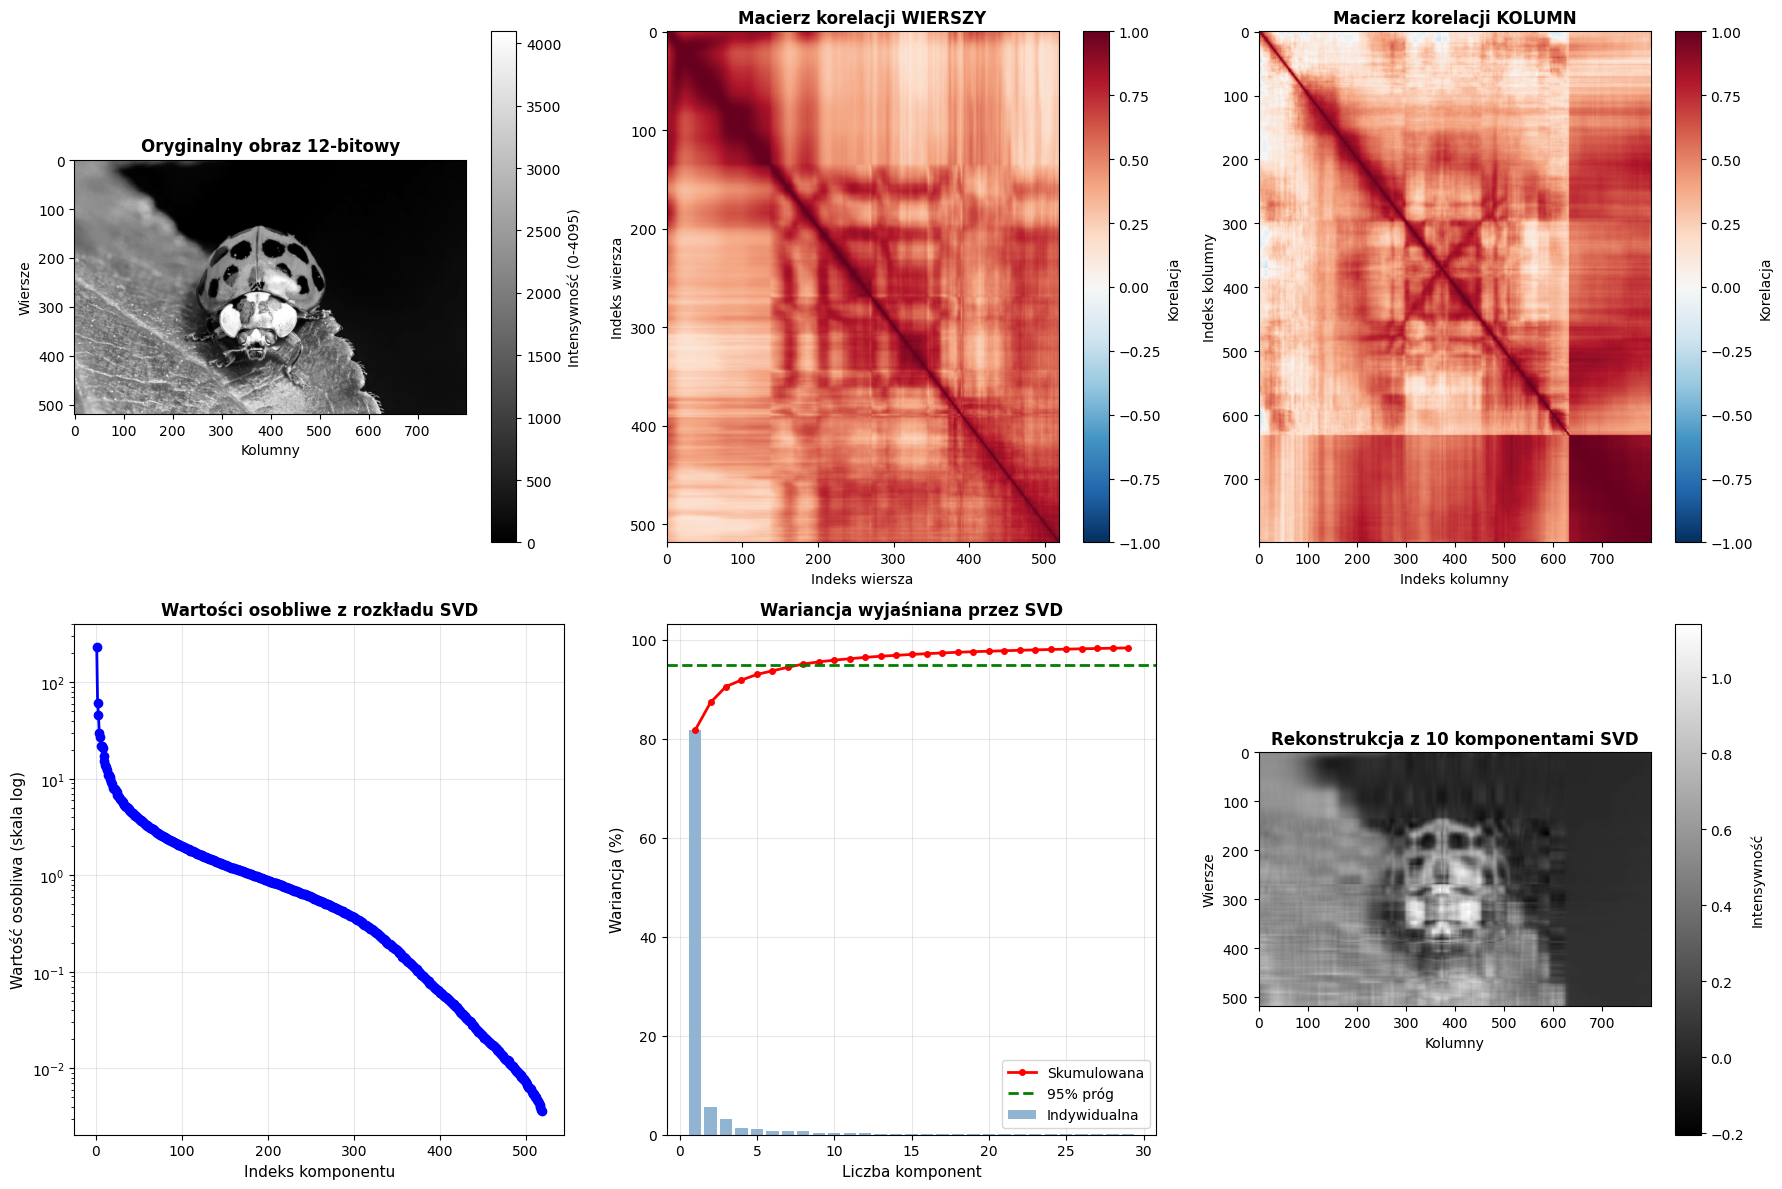


WNIOSKI Z ANALIZY

1. MACIERZ KORELACJI WIERSZY:
   - Pokazuje podobieństwo zwischen poszczególnymi wierszami obrazu
   - Wartości bliskie 1: wiersze bardzo podobne
   - Wartości bliskie -1: wiersze całkowicie odmienne
   - Przekątna zawsze = 1 (każdy wiersz z samym sobą)
   
2. MACIERZ KORELACJI KOLUMN:
   - Analogicznie do wierszy, ale dla kolumn
   - Symetria macierzy: corr(i,j) = corr(j,i)
   - Wysokie wartości poza diagonalą wskazują na powtarzające się struktury
   
3. ROZKŁAD SVD:
   - Dzieli obraz na ortogonalne komponenty
   - Wartości osobliwe maleją - pierwsze zawierają największą informację
   - Liczba istotnych komponent << wymiary obrazu (kompresja)
   - Ostatnie komponenty zawierają głównie szum
   
4. REKONSTRUKCJA:
   - Obraz można odtworzyć z pewną utratą informacji
   - k komponent wyjaśnia część wariancji
   - Przydatne dla kompresji i zmniejszenia szumu
   
5. OBRAZ 12-BITOWY:
   - Zakres: 0-4095 (2^12 wartości)
   - Wyższa precyzja niż 8-bitowy (256 wartości)
   

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from PIL import Image

try:
    import seaborn as sns
except ImportError:
    print("Seaborn niedostępny, używam matplotlib")
    sns = None

# ==================== WCZYTANIE OBRAZU ====================

image_path = '9.webp'

try:
    img_pil = Image.open(image_path)
    
    if img_pil.mode != 'L':
        img_pil = img_pil.convert('L')
    
    img = np.array(img_pil, dtype=np.uint8)
    
    image = img.astype(np.uint16) * (4095 / 255) 
    image = np.uint16(np.clip(image, 0, 4095))
    print(f"✓ Obraz wczytany pomyślnie z: {image_path}")
        
except Exception as e:
    print(f"Błąd przy wczytywaniu: {e}")
    print("Generuję testowy obraz zamiast tego...")
    
    np.random.seed(42)
    rows, cols = 64, 64
    x = np.linspace(0, 2*np.pi, cols)
    y = np.linspace(0, 2*np.pi, rows)
    X, Y = np.meshgrid(x, y)
    image = (np.sin(X) + np.cos(Y)) * 2047 + 2047
    image = np.uint16(np.clip(image, 0, 4095))

print(f"Wymiary obrazu: {image.shape}")
print(f"Zakres wartości: [{image.min()}, {image.max()}]")
print(f"Liczba bitów: 12-bit (0-4095)")

# ==================== NORMALIZACJA ====================

image_normalized = image.astype(np.float32) / 4095.0

print(f"\nZakres znormalizowany: [{image_normalized.min():.4f}, {image_normalized.max():.4f}]")

# ==================== KORELACJA WIERSZY ====================

print("\n" + "="*60)
print("MACIERZ KORELACJI WIERSZY")
print("="*60)

correlation_rows = np.corrcoef(image_normalized)

print(f"Wymiary macierzy korelacji wierszy: {correlation_rows.shape}")
print(f"Średnia korelacja (bez diagonali): {np.mean(correlation_rows[np.triu_indices_from(correlation_rows, k=1)]):.4f}")
print(f"Min korelacja: {np.min(correlation_rows[np.triu_indices_from(correlation_rows, k=1)]):.4f}")
print(f"Max korelacja: {np.max(correlation_rows[np.triu_indices_from(correlation_rows, k=1)]):.4f}")

# ==================== KORELACJA KOLUMN ====================

print("\n" + "="*60)
print("MACIERZ KORELACJI KOLUMN")
print("="*60)

correlation_cols = np.corrcoef(image_normalized.T)

print(f"Wymiary macierzy korelacji kolumn: {correlation_cols.shape}")
print(f"Średnia korelacja (bez diagonali): {np.mean(correlation_cols[np.triu_indices_from(correlation_cols, k=1)]):.4f}")
print(f"Min korelacja: {np.min(correlation_cols[np.triu_indices_from(correlation_cols, k=1)]):.4f}")
print(f"Max korelacja: {np.max(correlation_cols[np.triu_indices_from(correlation_cols, k=1)]):.4f}")

# ==================== SVD ====================

print("\n" + "="*60)
print("ROZKŁAD SVD (Singular Value Decomposition)")
print("="*60)

U, S, Vt = svd(image_normalized, full_matrices=False)

print(f"Wymiary U: {U.shape}")
print(f"Wymiary S: {S.shape}")
print(f"Wymiary V^T: {Vt.shape}")
print(f"\n5 największych wartości osobliwych:")
for i in range(min(5, len(S))):
    print(f"  σ_{i+1} = {S[i]:.6f}")

variance = (S ** 2) / np.sum(S ** 2)
cumsum_variance = np.cumsum(variance)

print(f"\nWariancja wyjaśniana przez pierwsze 5 komponent:")
for i in range(min(5, len(variance))):
    print(f"  σ_{i+1}: {variance[i]*100:.2f}% (skumulowana: {cumsum_variance[i]*100:.2f}%)")

n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
print(f"\nLiczba komponent do wyjaśnienia 95% wariancji: {n_components_95}")

# ==================== WIZUALIZACJA ====================

fig = plt.figure(figsize=(18, 12))

ax1 = plt.subplot(2, 3, 1)
im1 = ax1.imshow(image, cmap='gray')
ax1.set_title('Oryginalny obraz 12-bitowy', fontsize=12, fontweight='bold')
ax1.set_xlabel('Kolumny')
ax1.set_ylabel('Wiersze')
plt.colorbar(im1, ax=ax1, label='Intensywność (0-4095)')

ax2 = plt.subplot(2, 3, 2)
if sns:
    sns.heatmap(correlation_rows, cmap='RdBu_r', center=0, vmin=-1, vmax=1, 
                ax=ax2, cbar_kws={'label': 'Korelacja'}, square=True)
else:
    im2 = ax2.imshow(correlation_rows, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
    plt.colorbar(im2, ax=ax2, label='Korelacja')
ax2.set_title('Macierz korelacji WIERSZY', fontsize=12, fontweight='bold')
ax2.set_xlabel('Indeks wiersza')
ax2.set_ylabel('Indeks wiersza')

ax3 = plt.subplot(2, 3, 3)
if sns:
    sns.heatmap(correlation_cols, cmap='RdBu_r', center=0, vmin=-1, vmax=1, 
                ax=ax3, cbar_kws={'label': 'Korelacja'}, square=True)
else:
    im3 = ax3.imshow(correlation_cols, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
    plt.colorbar(im3, ax=ax3, label='Korelacja')
ax3.set_title('Macierz korelacji KOLUMN', fontsize=12, fontweight='bold')
ax3.set_xlabel('Indeks kolumny')
ax3.set_ylabel('Indeks kolumny')

ax4 = plt.subplot(2, 3, 4)
ax4.semilogy(range(1, len(S)+1), S, 'bo-', linewidth=2, markersize=6)
ax4.set_xlabel('Indeks komponentu', fontsize=11)
ax4.set_ylabel('Wartość osobliwa (skala log)', fontsize=11)
ax4.set_title('Wartości osobliwe z rozkładu SVD', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

ax5 = plt.subplot(2, 3, 5)
ax5.bar(range(1, min(len(variance)+1, 30)), variance[:29]*100, alpha=0.6, label='Indywidualna', color='steelblue')
ax5.plot(range(1, min(len(cumsum_variance)+1, 30)), cumsum_variance[:29]*100, 'r-o', linewidth=2, markersize=4, label='Skumulowana')
ax5.axhline(y=95, color='g', linestyle='--', linewidth=2, label='95% próg')
ax5.set_xlabel('Liczba komponent', fontsize=11)
ax5.set_ylabel('Wariancja (%)', fontsize=11)
ax5.set_title('Wariancja wyjaśniana przez SVD', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

ax6 = plt.subplot(2, 3, 6)
k = 10
U_k = U[:, :k]
S_k = S[:k]
Vt_k = Vt[:k, :]
image_reconstructed = U_k @ np.diag(S_k) @ Vt_k
im6 = ax6.imshow(image_reconstructed, cmap='gray')
ax6.set_title(f'Rekonstrukcja z {k} komponentami SVD', fontsize=12, fontweight='bold')
ax6.set_xlabel('Kolumny')
ax6.set_ylabel('Wiersze')
plt.colorbar(im6, ax=ax6, label='Intensywność')

plt.tight_layout()
plt.show()

# ==================== WNIOSKI ====================

print("\n" + "="*60)
print("WNIOSKI Z ANALIZY")
print("="*60)

print("""
1. MACIERZ KORELACJI WIERSZY:
   - Pokazuje podobieństwo zwischen poszczególnymi wierszami obrazu
   - Wartości bliskie 1: wiersze bardzo podobne
   - Wartości bliskie -1: wiersze całkowicie odmienne
   - Przekątna zawsze = 1 (każdy wiersz z samym sobą)
   
2. MACIERZ KORELACJI KOLUMN:
   - Analogicznie do wierszy, ale dla kolumn
   - Symetria macierzy: corr(i,j) = corr(j,i)
   - Wysokie wartości poza diagonalą wskazują na powtarzające się struktury
   
3. ROZKŁAD SVD:
   - Dzieli obraz na ortogonalne komponenty
   - Wartości osobliwe maleją - pierwsze zawierają największą informację
   - Liczba istotnych komponent << wymiary obrazu (kompresja)
   - Ostatnie komponenty zawierają głównie szum
   
4. REKONSTRUKCJA:
   - Obraz można odtworzyć z pewną utratą informacji
   - k komponent wyjaśnia część wariancji
   - Przydatne dla kompresji i zmniejszenia szumu
   
5. OBRAZ 12-BITOWY:
   - Zakres: 0-4095 (2^12 wartości)
   - Wyższa precyzja niż 8-bitowy (256 wartości)
   - Stosowany w: medycynie, astronomii, fotografii naukowej
""")

# ==================== STATYSTYKI ====================

print("\nSTATYSTYKI SZCZEGÓŁOWE:")
print(f"Średnia intensywność: {image.mean():.2f}")
print(f"Odchylenie standardowe: {image.std():.2f}")
print(f"Liczba wierszy: {image.shape[0]}")
print(f"Liczba kolumn: {image.shape[1]}")
print(f"Razem pikseli: {image.size}")
print(f"Rozdzielczość bitowa: 12-bit")

<class 'OSError'>: Not available